## Hitchhiker's guide to Exploratory Data Analysis

1. “How do I get a kickstart in the field of Data Science/Machine learning/Data Analysis?”
2. “What should be my initial steps towards making a connection with the dataset when you have it?”
3. “How to define a set of questions looking at a dataset during exploratory analysis?”


URL - https://towardsdatascience.com/hitchhikers-guide-to-exploratory-data-analysis-6e8d896d3f7e

## what is Exploratory Data Analysis (EDA)?

Exploratory data analysis (EDA) is a crucial component of data science which allows you to develop the gist of what your data look like and what kinds of questions might be answered by them.


Ultimately, EDA is important because it allows the investigator to make critical decisions about 
1. what is interesting to pursue 
2. what probably isn’t worth following up on 
3. thus building a hypothesis using the relationships between variables.

This is a two part series where we are going to look into a Movie dataset from Kaggle and we’ll do some exploratory analysis to investigate the data. As a Data Analyst, my job is to be able to pose a set of questions, read between the lines and find answers to those questions.

*I’ve broken this down into 3 parts:-*

1. Cleansing: Checking for problems with the collected data, such as missing data or measurement error, data type of columns, etc.)
2. Defining questions: Identifying relationships between variables that are particularly interesting or unexpected.
3. Using effective visualizations to communicate my results(to be covered in the 2nd part)

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import os

from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline 

In [40]:
# load data =frames

data_dir = r'C:\Users\hai\Documents\notebook\data\movie'
credit_csv = 'tmdb_5000_credits.csv'
movie_csv = 'tmdb_5000_movies.csv'


credit_df = pd.read_csv(os.path.join(data_dir, credit_csv))
movie_df = pd.read_csv(os.path.join(data_dir, movie_csv))

In [41]:
movie_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

## Data cleansing process

### 1. Remove unused columns

In [42]:
del_col_list = ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'homepage', 
                'overview', 'production_companies', 'original_title']

movie_df = movie_df.drop(del_col_list, axis=1)

In [43]:
movie_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124


### 2. Removing duplicay in the rows if any

In [44]:
print(movie_df.shape)

movie_df = movie_df.drop_duplicates(keep='first')

print(movie_df.shape)

(4803, 12)
(4803, 12)


### 3. discarding rows or columns with 0 values or have not been recorded

In [45]:
cols = ['budget', 'revenue']

movie_df[cols] = movie_df[cols].replace(0, np.nan)

# dropping all rows will na values in columns
movie_df.dropna(subset=cols, inplace=True)

movie_df.shape

(3229, 12)

### 4. Manipulate string to correct python objects. Example data time string 

In [46]:
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])
movie_df['release_year'] = movie_df['release_date'].dt.year

movie_df.head(5)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,2009
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,2015
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1.084939e+09,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106,2012
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,2012


In [47]:
movie_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year
count,3.229000e+03,3229.000000,3229.000000,3.229000e+03,3229.000000,3229.000000,3229.000000,3229.000000
mean,4.065444e+07,44780.705791,29.033689,1.212430e+08,110.724373,6.309353,977.287395,2001.680396
std,4.439674e+07,74609.434723,36.165730,1.863029e+08,20.965694,0.873891,1414.309577,13.279525
min,1.000000e+00,5.000000,0.019984,5.000000e+00,41.000000,0.000000,0.000000,1916.000000
25%,1.050000e+07,4958.000000,10.446722,1.700000e+07,96.000000,5.800000,178.000000,1998.000000
50%,2.500000e+07,11451.000000,20.410354,5.518472e+07,107.000000,6.300000,471.000000,2005.000000
75%,5.500000e+07,45272.000000,37.335721,1.462920e+08,121.000000,6.900000,1148.000000,2010.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000,2016.000000


In [48]:
movie_df.dtypes

budget                         float64
genres                          object
id                               int64
popularity                     float64
production_countries            object
release_date            datetime64[ns]
revenue                        float64
runtime                        float64
spoken_languages                object
title                           object
vote_average                   float64
vote_count                       int64
release_year                     int64
dtype: object

In [49]:
change_cols = ['revenue', 'budget']

movie_df[change_cols] = movie_df[change_cols].applymap(np.int64)

In [50]:
movie_df.dtypes

budget                           int64
genres                          object
id                               int64
popularity                     float64
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
title                           object
vote_average                   float64
vote_count                       int64
release_year                     int64
dtype: object

### 5. Flatten the JSON

In [51]:
def parse_json(df, col, key):
    """
        example - parse_json(movie_df, 'genres', 'name')
    """
    for idx, items in zip(df.index, df[col].apply(json.loads)):
        list_str = []
        for val in items:
            list_str.append(val[key])
        movie_df.loc[idx, col] = str(list_str)
        

for l in [('genres', 'name'), ('spoken_languages', 'name'), ('production_countries', 'name')]:
    parse_json(df=movie_df, col=l[0], key=l[1])


In [52]:
movie_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012


# Identifying relationships between variables / features

In [53]:
# Answer to question #1.
# To find out the most expensive movies, we need to look at the budget set for them which is an indicator of expense.

expensive_movies_df = movie_df.sort_values(by ='budget', ascending=False)
expensive_movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
17,380000000,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,['United States of America'],2011-05-14,1045713802,136.0,"['English', 'Español']",Pirates of the Caribbean: On Stranger Tides,6.4,4948,2011
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,2015
10,270000000,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",1452,57.925623,['United States of America'],2006-06-28,391081192,154.0,"['English', 'Français', 'Deutsch']",Superman Returns,5.4,1400,2006
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012


In [54]:
expensive_movies_df[::-1][:1] # sort smallest
expensive_movies_df[:1] # sort largest 

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
17,380000000,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,['United States of America'],2011-05-14,1045713802,136.0,"['English', 'Español']",Pirates of the Caribbean: On Stranger Tides,6.4,4948,2011


In [55]:
# to find the most profitable movies, we need to find who made the most 
# amount after deducting the budget from the revenue generated.

movie_df['profit'] = movie_df['revenue'] - movie_df['budget']
cols = ['budget',
         'profit',
         'revenue',
         'genres',
         'id',
         'popularity',
         'production_countries',
        'release_date',
        'release_year',
         'runtime',
         'spoken_languages',
         'title',
         'vote_average',
         'vote_count']
movie_df = movie_df[cols]
movie_df.sort_values(by = ['profit'], ascending=False).head(10)

,budget,profit,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,2550965087,2787965087,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2009,162.0,"['English', 'Español']",Avatar,7.2,11800
25,200000000,1645034188,1845034188,"['Drama', 'Romance', 'Thriller']",597,100.025899,['United States of America'],1997-11-18,1997,194.0,"['English', 'Français', 'Deutsch', 'svenska', ...",Titanic,7.5,7562
28,150000000,1363528810,1513528810,"['Action', 'Adventure', 'Science Fiction', 'Th...",135397,418.708552,['United States of America'],2015-06-09,2015,124.0,['English'],Jurassic World,6.5,8662
44,190000000,1316249360,1506249360,['Action'],168259,102.322217,"['Japan', 'United States of America']",2015-04-01,2015,137.0,['English'],Furious 7,7.3,4176
16,220000000,1299557910,1519557910,"['Science Fiction', 'Action', 'Adventure']",24428,144.448633,['United States of America'],2012-04-25,2012,143.0,['English'],The Avengers,7.4,11776
7,280000000,1125403694,1405403694,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,2015,141.0,['English'],Avengers: Age of Ultron,7.3,6767
124,150000000,1124219009,1274219009,"['Animation', 'Adventure', 'Family']",109445,165.125366,['United States of America'],2013-11-27,2013,102.0,['English'],Frozen,7.3,5295
546,74000000,1082730962,1156730962,"['Family', 'Animation', 'Adventure', 'Comedy']",211672,875.581305,['United States of America'],2015-06-17,2015,91.0,['English'],Minions,6.4,4571
329,94000000,1024888979,1118888979,"['Adventure', 'Fantasy', 'Action']",122,123.630332,"['New Zealand', 'United States of America']",2003-12-01,2003,201.0,['English'],The Lord of the Rings: The Return of the King,8.1,8064
31,200000000,1015439994,1215439994,"['Action', 'Adventure', 'Science Fiction']",68721,77.682080,"['China', 'United States of America']",2013-04-18,2013,130.0,['English'],Iron Man 3,6.8,8806


In [56]:
# to find the most talked about movies, we can sort the dataframe on the popularity column
popular_movies_df = movie_df.sort_values(by ='popularity', ascending=False).head()
popular_movies_df.head()

,budget,profit,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,title,vote_average,vote_count
546,74000000,1082730962,1156730962,"['Family', 'Animation', 'Adventure', 'Comedy']",211672,875.581305,['United States of America'],2015-06-17,2015,91.0,['English'],Minions,6.4,4571
95,165000000,510120017,675120017,"['Adventure', 'Drama', 'Science Fiction']",157336,724.247784,"['Canada', 'United States of America', 'United...",2014-11-05,2014,169.0,['English'],Interstellar,8.1,10867
788,58000000,725112979,783112979,"['Action', 'Adventure', 'Comedy']",293660,514.569956,['United States of America'],2016-02-09,2016,108.0,['English'],Deadpool,7.4,10995
94,170000000,603328629,773328629,"['Action', 'Science Fiction', 'Adventure']",118340,481.098624,"['United Kingdom', 'United States of America']",2014-07-30,2014,121.0,['English'],Guardians of the Galaxy,7.9,9742
127,150000000,228858340,378858340,"['Action', 'Adventure', 'Science Fiction', 'Th...",76341,434.278564,"['Australia', 'United States of America']",2015-05-13,2015,120.0,['English'],Mad Max: Fury Road,7.2,9427


In [57]:
movie_df['runtime'].mean()


110.72437287085785

In [58]:
# movies rated above 7 

movie_df[movie_df['vote_average'] >= 8.0]


,budget,profit,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,title,vote_average,vote_count
65,185000000,819558444,1004558444,"['Drama', 'Action', 'Crime', 'Thriller']",155,187.322927,"['United Kingdom', 'United States of America']",2008-07-16,2008,152.0,"['English', '普通话']",The Dark Knight,8.2,12002
77,175000000,682611174,857611174,"['Drama', 'Comedy', 'Animation', 'Family']",150540,128.655964,['United States of America'],2015-06-09,2015,94.0,['English'],Inside Out,8.0,6560
95,165000000,510120017,675120017,"['Adventure', 'Drama', 'Science Fiction']",157336,724.247784,"['Canada', 'United States of America', 'United...",2014-11-05,2014,169.0,['English'],Interstellar,8.1,10867
96,160000000,665532764,825532764,"['Action', 'Thriller', 'Science Fiction', 'Mys...",27205,167.583710,"['United Kingdom', 'United States of America']",2010-07-14,2010,148.0,"['English', '日本語', 'Français']",Inception,8.1,13752
262,93000000,778368364,871368364,"['Adventure', 'Fantasy', 'Action']",120,138.049577,"['New Zealand', 'United States of America']",2001-12-18,2001,178.0,['English'],The Lord of the Rings: The Fellowship of the Ring,8.0,8705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4337,1300000,26962574,28262574,"['Crime', 'Drama']",103,58.845025,['United States of America'],1976-02-07,1976,114.0,"['English', 'Español']",Taxi Driver,8.0,2535
4432,910000,8690000,9600000,"['Crime', 'Drama']",654,16.015599,['United States of America'],1954-06-22,1954,108.0,['English'],On the Waterfront,8.0,357
4535,2000000,-1728159,271841,"['Action', 'Drama']",346,39.756748,['Japan'],1954-04-26,1954,207.0,['日本語'],Seven Samurai,8.2,878
4602,350000,650000,1000000,['Drama'],389,59.259204,['United States of America'],1957-03-25,1957,96.0,['English'],12 Angry Men,8.2,2078


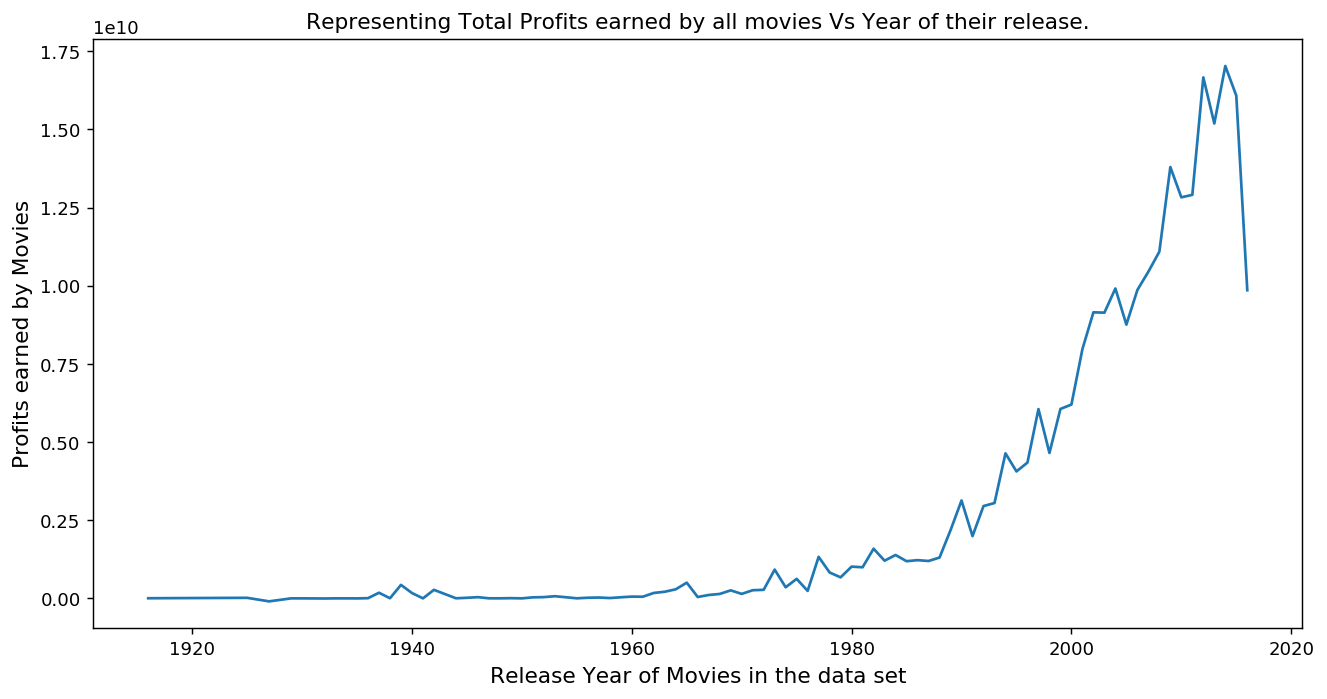

In [59]:
# Which year did we have the most profitable movies?

profits_year = movie_df.groupby('release_year')['profit'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs Year of their release.')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()

In [60]:
# Most profitable year from the given dataset.

profits_year.idxmax()


profits_year.nlargest(10)

release_year
2014    17029736072
2012    16665370551
2015    16082841939
2013    15191240622
2009    13798015000
2011    12908799676
2010    12829866421
2008    11092175434
2007    10451427310
2004     9914298651
Name: profit, dtype: int64

## Following is the list of questions which can lead us in the desired direction:-

1. Most successful genres — bar plot explaining the frequency of movies in each genre.
2. Frequent Cast in movies — plot showing the spectrum of movies for each actor.
3. Average budget of the profitable movies — what is the average budget allocated
4. Average duration of the most profitable movies.
5. Language of the most profitable movies.


## Seaborn:
a data visualization library is written in python based on Matplotlib. With an emphasis on statistical plots. The library is a good resource for visualizing univariate and bivariate and distribution plots, but seaborn helps in high-level abstractions for structuring multi-plot grids that let you easily build complex visualizations.

In [61]:
'[ssss]'.strip('[]')

'ssss'

In [62]:
movie_df['genres'] =  movie_df['genres'].str.strip('[]').str.replace(' ', '').str.replace("'", '')
movie_df['genres'] =  movie_df['genres'].str.split(',')

movie_df['genres']



0       [Action, Adventure, Fantasy, ScienceFiction]
1                       [Adventure, Fantasy, Action]
2                         [Action, Adventure, Crime]
3                   [Action, Crime, Drama, Thriller]
4                [Action, Adventure, ScienceFiction]
                            ...                     
4773                                        [Comedy]
4788                         [Horror, Comedy, Crime]
4792              [Crime, Horror, Mystery, Thriller]
4796               [ScienceFiction, Drama, Thriller]
4798                       [Action, Crime, Thriller]
Name: genres, Length: 3229, dtype: object

In [63]:
movie_df['production_countries'] =  movie_df['production_countries'].str.strip('[]').str.replace(' ', '').str.replace("'", '')
movie_df['production_countries'] =  movie_df['production_countries'].str.split(',')

movie_df['production_countries']

0       [UnitedStatesofAmerica, UnitedKingdom]
1                      [UnitedStatesofAmerica]
2       [UnitedKingdom, UnitedStatesofAmerica]
3                      [UnitedStatesofAmerica]
4                      [UnitedStatesofAmerica]
                         ...                  
4773                   [UnitedStatesofAmerica]
4788                   [UnitedStatesofAmerica]
4792                                   [Japan]
4796                   [UnitedStatesofAmerica]
4798           [Mexico, UnitedStatesofAmerica]
Name: production_countries, Length: 3229, dtype: object

In [64]:
movie_df['spoken_languages'] =  movie_df['spoken_languages'].str.strip('[]').str.replace(' ', '').str.replace("'", '')
movie_df['spoken_languages'] =  movie_df['spoken_languages'].str.split(',')

movie_df['spoken_languages']

0                                    [English, Español]
1                                             [English]
2       [Français, English, Español, Italiano, Deutsch]
3                                             [English]
4                                             [English]
                             ...                       
4773                                          [English]
4788                                          [English]
4792                                              [日本語]
4796                                          [English]
4798                                          [Español]
Name: spoken_languages, Length: 3229, dtype: object

In [65]:
#selecting the movies having profit $50M or more

profit_data = movie_df[movie_df['profit'] >= 50000000]

#reindexing new data
profit_data.index = range(len(profit_data))

#we will start from 1 instead of 0
profit_data.index = profit_data.index + 1


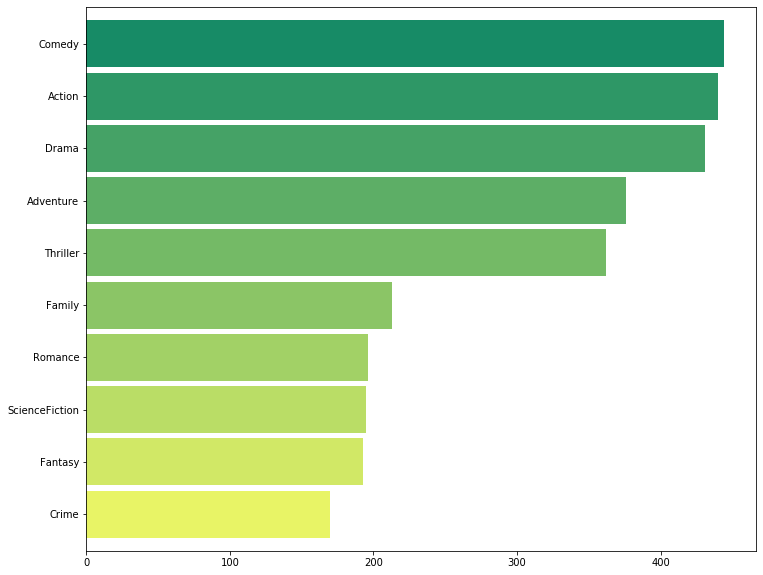

In [66]:
plt.subplots(figsize=(12,10))
genres = []

for g in profit_data['genres']:
    genres.extend(g)


genres_count_series = pd.Series(genres).value_counts()[:10].sort_values(ascending=True)

ax = genres_count_series.plot.barh(width=0.9, color=sns.color_palette('summer_r', 10))



In [67]:
profit_data.head()

,budget,profit,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,title,vote_average,vote_count
1,237000000,2550965087,2787965087,"[Action, Adventure, Fantasy, ScienceFiction]",19995,150.437577,"[UnitedStatesofAmerica, UnitedKingdom]",2009-12-10,2009,162.0,"[English, Español]",Avatar,7.2,11800
2,300000000,661000000,961000000,"[Adventure, Fantasy, Action]",285,139.082615,[UnitedStatesofAmerica],2007-05-19,2007,169.0,[English],Pirates of the Caribbean: At World's End,6.9,4500
3,245000000,635674609,880674609,"[Action, Adventure, Crime]",206647,107.376788,"[UnitedKingdom, UnitedStatesofAmerica]",2015-10-26,2015,148.0,"[Français, English, Español, Italiano, Deutsch]",Spectre,6.3,4466
4,250000000,834939099,1084939099,"[Action, Crime, Drama, Thriller]",49026,112.312950,[UnitedStatesofAmerica],2012-07-16,2012,165.0,[English],The Dark Knight Rises,7.6,9106
5,258000000,632871626,890871626,"[Fantasy, Action, Adventure]",559,115.699814,[UnitedStatesofAmerica],2007-05-01,2007,139.0,"[English, Français]",Spider-Man 3,5.9,3576


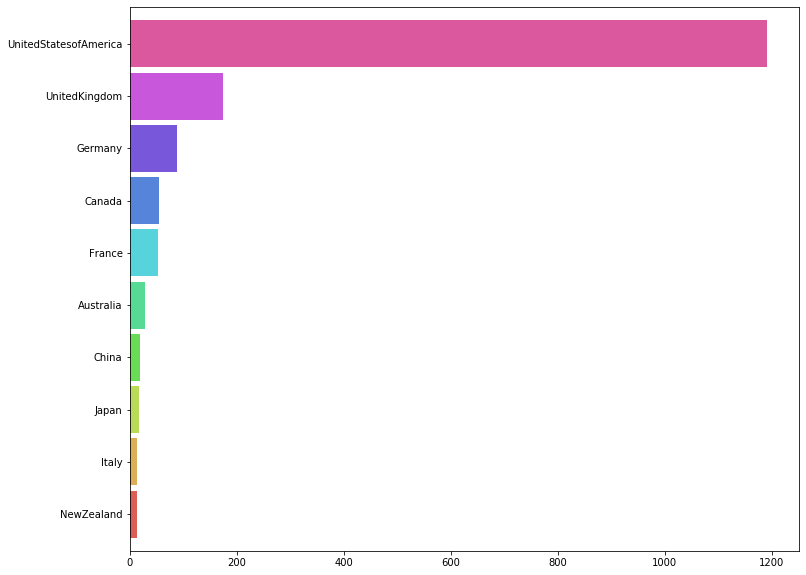

In [68]:
plt.subplots(figsize=(12,10))
genres = []

for g in profit_data['production_countries']:
    genres.extend(g)


genres_count_series = pd.Series(genres).value_counts()[:10].sort_values(ascending=True)

ax = genres_count_series.plot.barh(width=0.9, color=sns.color_palette('hls', 10))


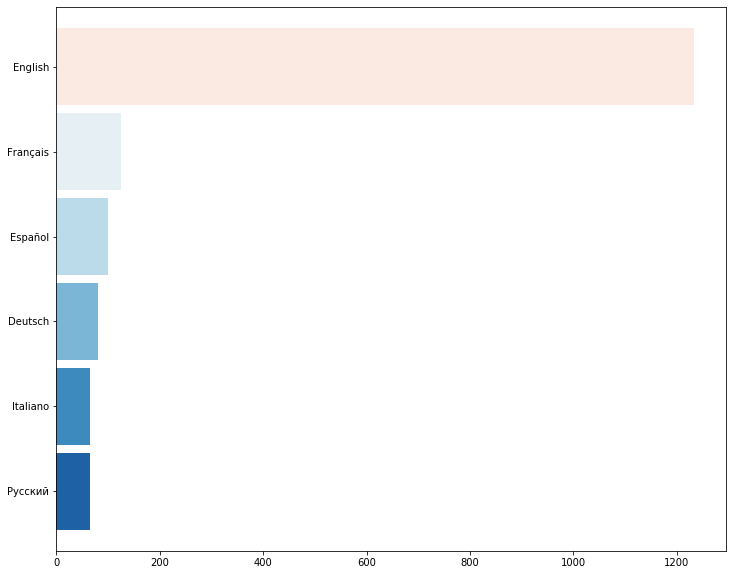

In [75]:
plt.subplots(figsize=(12,10))
genres = []

for g in profit_data['spoken_languages']:
    genres.extend(g)


genres_count_series = pd.Series(genres).value_counts()[:6].sort_values(ascending=True)

ax = genres_count_series.plot.barh(width=0.9, color=sns.color_palette('RdBu_r', 10))
